We have to import this file to path in the google server for accessing json objects.

In [1]:
pip install jsonlines


Importing necessary libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import jsonlines
import string
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Function to read json to dataframe.

In [3]:
data_list = []
file_path="/content/drive/MyDrive/ML-SMART SENSE/News_Category_Dataset_v3.json"
with jsonlines.open(file_path) as reader:
    for line in reader:
        data_list.append(line)
df=pd.DataFrame(data_list)
df.head(7)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22


In [4]:
c_drop=["link","authors","date","short_description"]
df=df.drop(columns=c_drop)
df.head(7)

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS
5,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS
6,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS


In [5]:
df = df.dropna()

In [10]:
cnt_type=df["category"].value_counts()
cnt_type

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [6]:
des_c=["POLITICS","WELLNESS","ENTERTAINMENT","TRAVEL"]
df=df[df['category'].isin(des_c)]
df.head(7)

,headline,category
20,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT
21,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS
28,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT
30,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS
39,Amazon Greenlights 'Blade Runner 2099' Limited...,ENTERTAINMENT
40,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS


In [7]:
cnt_type=df["category"].value_counts()
cnt_type

POLITICS         35602
WELLNESS         17945
ENTERTAINMENT    17362
TRAVEL            9900
Name: category, dtype: int64

The initial taken is very huge it could lead to high time and space complexities for our ML model hence I have decided to truncate the dataset in proportation to the the biasness towards anything remains same.

In [8]:
df=df.sample(frac=0.2,random_state=42)

From the below central measure we ccan see that the skewness is very less and postive hence the data is closely centred around mean with postive implying most data points are concentrated on the left hand side.

In [9]:
words_per_headline=df.headline.apply(lambda x:len(x.split(" ")))
print('Average Words:',words_per_headline.mean())
print(words_per_headline.max())
print('Skewness:',words_per_headline.skew())

Average Words: 9.609701769582973
44
Skewness: 0.144776682925846


In [10]:
for x in des_c:
  words_per_headline=df[df['category']==x].headline.apply(lambda x:len(x.split(" ")))
  print(x)
  print('Average Words:',words_per_headline.mean())
  print(words_per_headline.max())
  print('Skewness:',words_per_headline.skew())
  print(" ")

POLITICS
Average Words: 10.171364148816235
26
Skewness: -0.047263833783217205
 
WELLNESS
Average Words: 8.11718309859155
22
Skewness: 0.37215062913005303
 
ENTERTAINMENT
Average Words: 10.750722125938763
44
Skewness: 0.6880623721531388
 
TRAVEL
Average Words: 8.32570593962999
26
Skewness: 0.6971988678474513
 


Importing stop word dataset

In [11]:
stp_word=set(stopwords.words('english'))


EDA
Here we have word cloud representation of the most frequent 50 words of each category

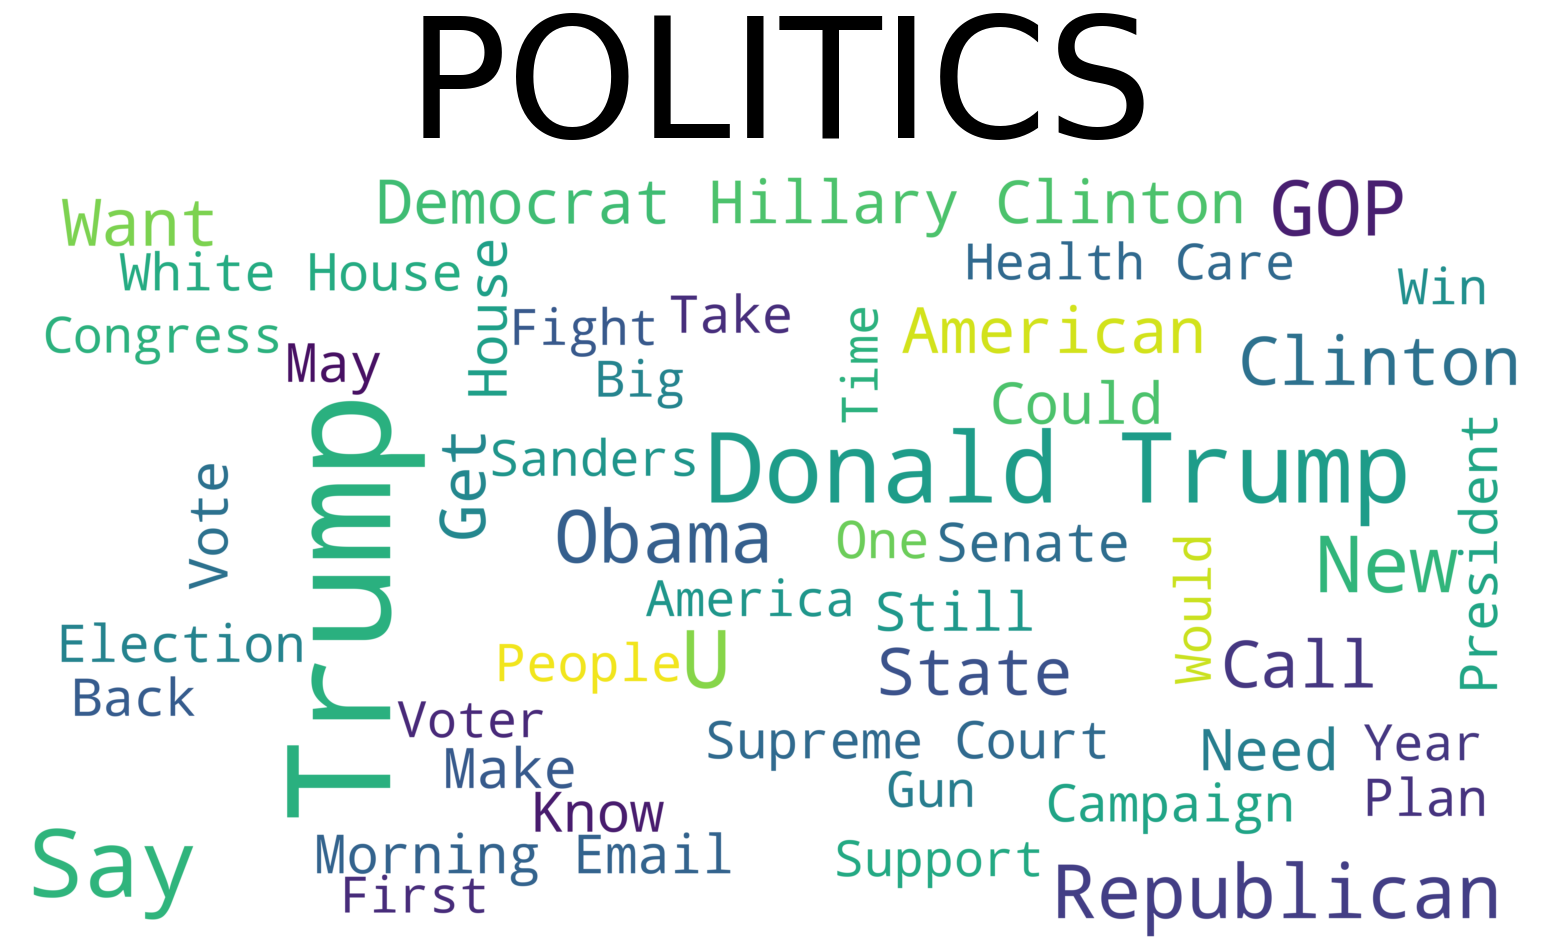

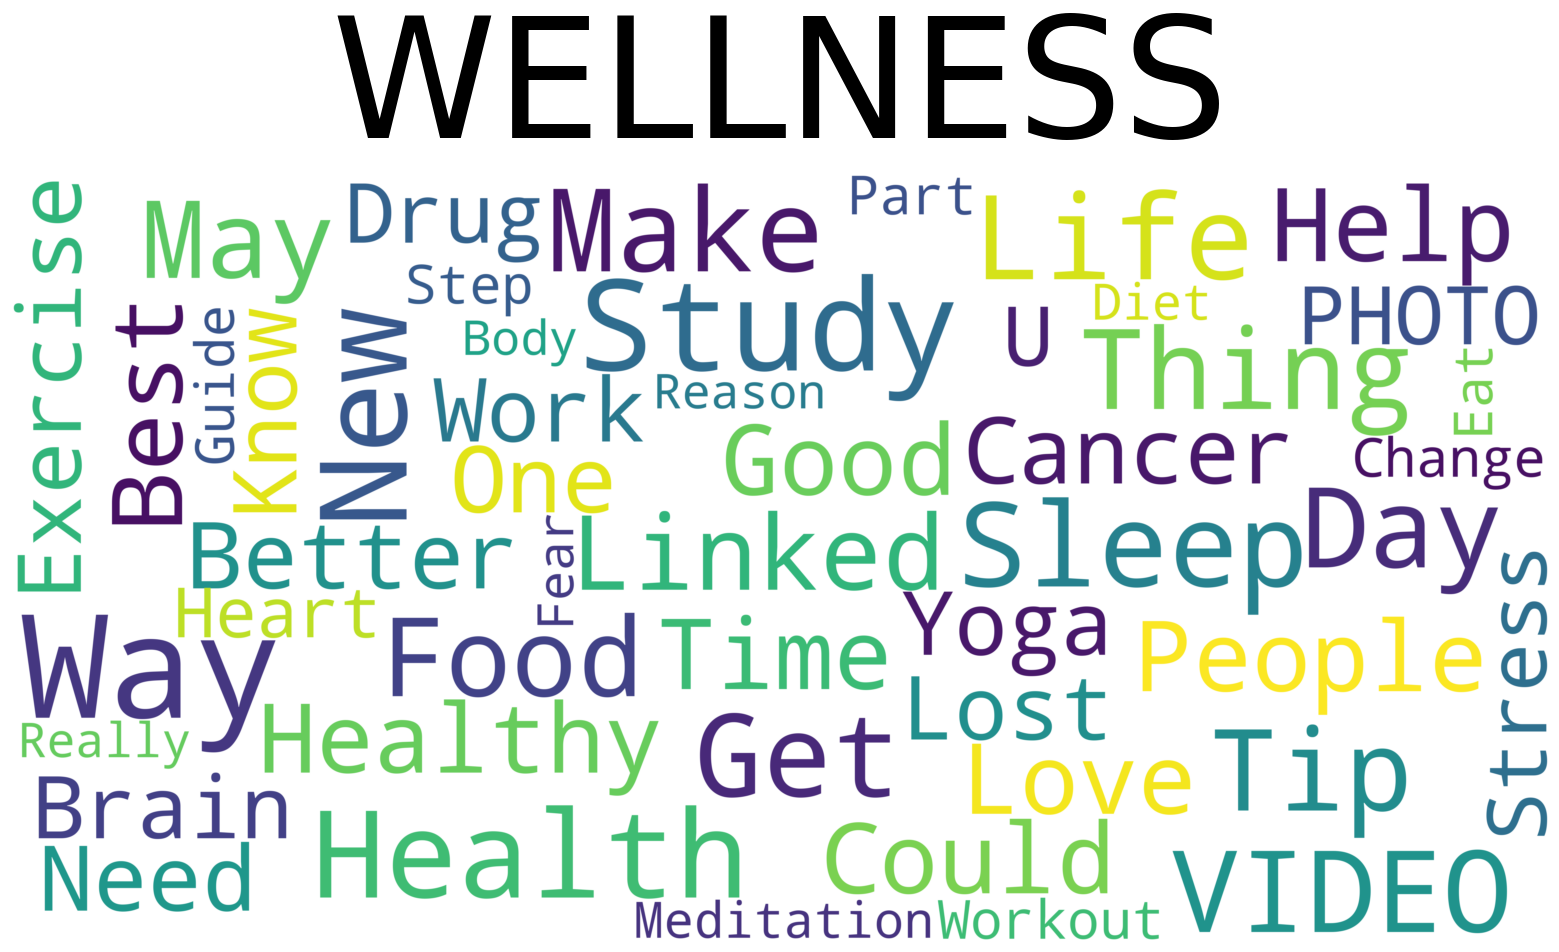

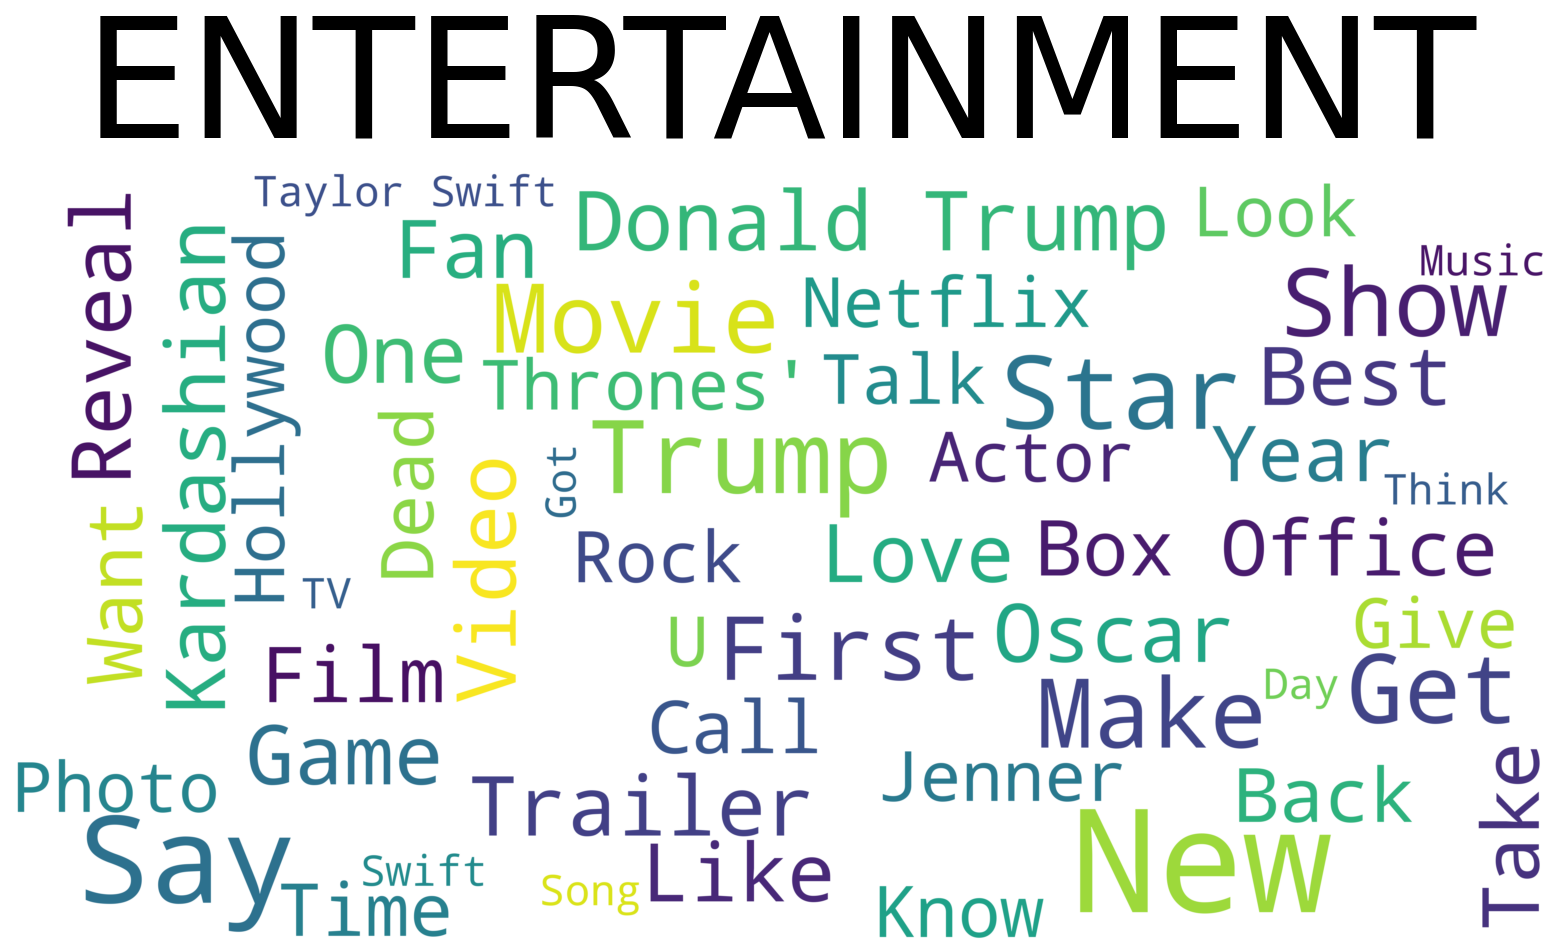

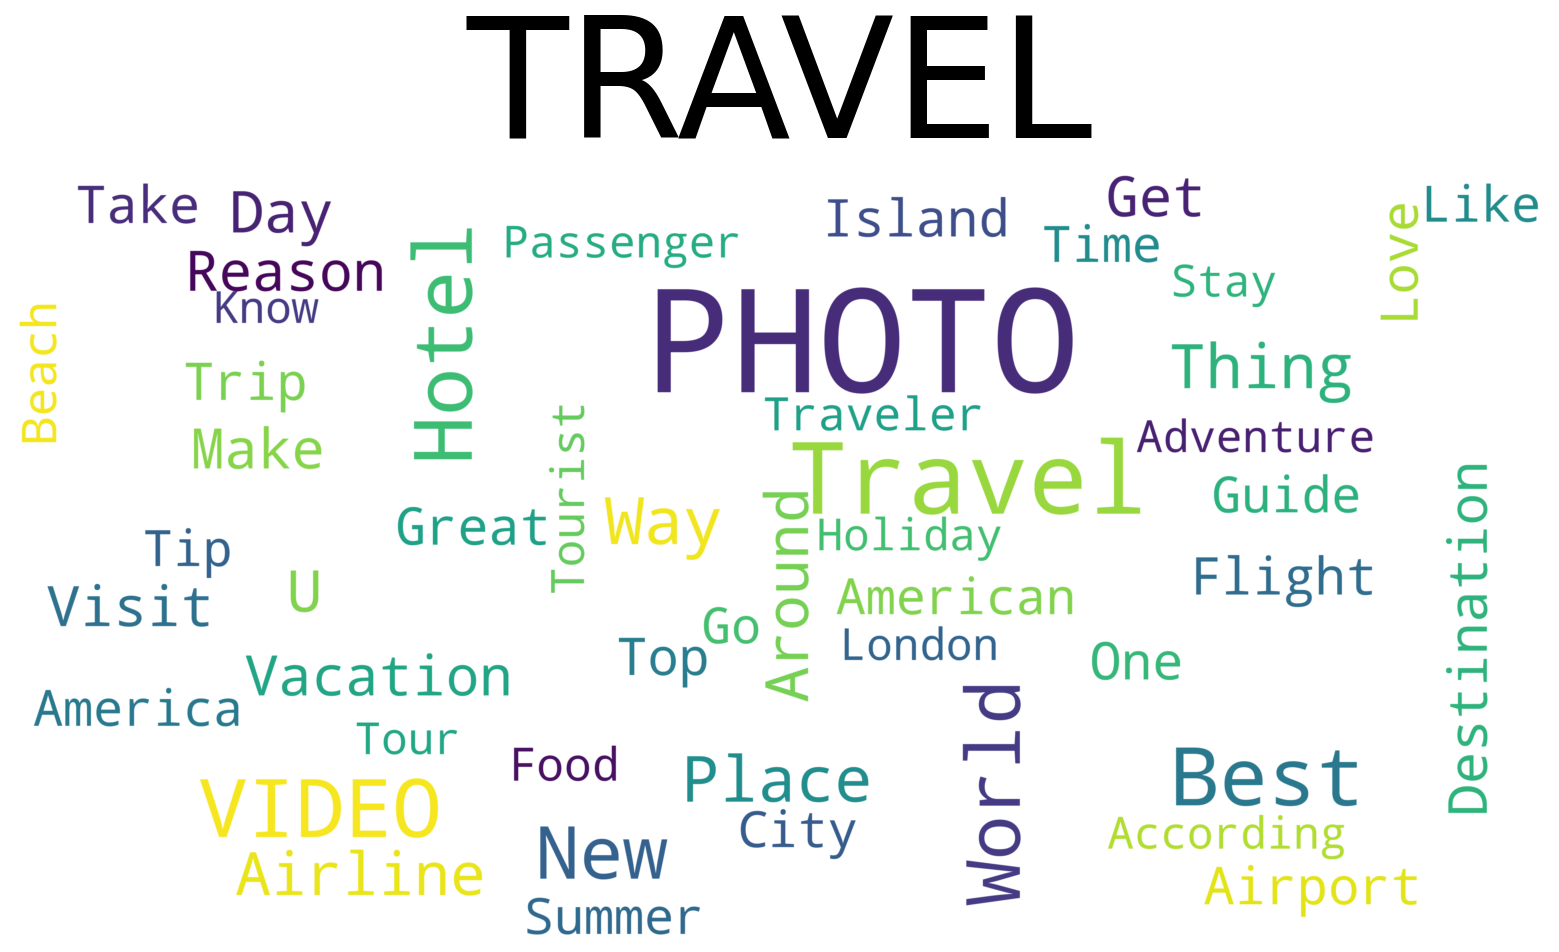

In [10]:
for x in des_c:
  sarcastic=df[df['category']==x]
  sarcastic=sarcastic['headline']
  word_cloud_text=''.join(sarcastic)
  wordcloud=WordCloud(max_font_size=75,
                    max_words=50,
                    background_color='white',
                    scale=10,
                    width=800,
                    height=400,
                    stopwords=stp_word).generate(word_cloud_text)
  plt.figure(figsize=(30,10))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.title(x,fontsize=120)
  plt.show()

Text preprocessing scheme:-
lowering of alphabets=>removal of punctuations=>removing non alphanumeric keywords and numerical values=>stopword removal=>lemmetization



In [12]:
df['headline']=df['headline'].str.lower()

In [13]:
def handle_punctuation(text, replace_with=''):
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = text.translate(translator)
    if replace_with:
        cleaned_text = cleaned_text.replace(' ', replace_with)
    return cleaned_text

# Apply the handle_punctuation function to the 'headline' column
df['headline'] = df['headline'].apply(handle_punctuation)

In [14]:
def clean_headline(text, replace_with=''):
    # Remove numbers
    cleaned_text = ''.join(char if not char.isdigit() else replace_with for char in text)

    # Remove non-alphabetic characters (including spaces)
    cleaned_text = ''.join(char if char.isalpha() or char.isspace() else replace_with for char in cleaned_text)

    return cleaned_text

# Apply the clean_headline function to the 'headline' column
df['headline'] = df['headline'].apply(clean_headline)

In [15]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

# Apply the remove_stopwords function to the 'headline' column
df['headline'] = df['headline'].apply(remove_stopwords)
df.head(10)


,headline,category
5031,"[randy, rainbow, cuomosexual, covid, love, son...",ENTERTAINMENT
55099,"[postdebate, instant, polls, terrible]",POLITICS
69995,"[prepare, pinks, new, song, like, fire, get, s...",ENTERTAINMENT
92756,"[texas, attorney, general, ken, paxton, indicted]",POLITICS
135296,"[new, yes, tips, scaling, back, busy, life]",WELLNESS
113557,"[apology, travel, tips, professionals]",TRAVEL
148394,"[flip, side, giving, thanks]",WELLNESS
126744,"[inside, los, angeles, first, ever, marijuana,...",POLITICS
12016,"[sen, mark, warner, facebook, fully, forthcomi...",POLITICS
54456,"[hotels, think, want, bill, think, hotels]",TRAVEL


In [16]:
def lemmatizing_words(text):
  wordnet_lemmatizer=WordNetLemmatizer()
  return " ".join([wordnet_lemmatizer.lemmatize(word) for word in text])
df['headline']=df['headline'].apply(lemmatizing_words)



In [16]:
df.head(10)

,headline,category
20,golden globe returning nbc january year offair,ENTERTAINMENT
21,biden say u force would defend taiwan china in...,POLITICS
24,beautiful sad time ukrainian cultural festival...,POLITICS
28,james cameron say clashed studio avatar release,ENTERTAINMENT
30,biden say queen death left giant hole royal fa...,POLITICS
39,amazon greenlights blade runner limited series...,ENTERTAINMENT
40,bill help afghan escaped taliban face long odd...,POLITICS
43,phantom opera close broadway next year,ENTERTAINMENT
44,mark meadow complies justice dept subpoena report,POLITICS
47,viola davis feared heart attack woman king tra...,ENTERTAINMENT


Measurement of central measure after text processing

In [139]:
for x in des_c:
  words_per_headline=df[df['category']==x].headline.apply(lambda x:len(x.split(" ")))
  print(x)
  print('Average Words:',words_per_headline.mean())
  print(words_per_headline.max())
  print('Skewness:',words_per_headline.skew())
  print(" ")

POLITICS
Average Words: 7.47915847424302
18
Skewness: -0.23203554409366275
 
WELLNESS
Average Words: 5.263360267483979
16
Skewness: 0.5542607300180755
 
ENTERTAINMENT
Average Words: 7.613581384633107
36
Skewness: 0.1857931035905239
 
TRAVEL
Average Words: 5.619191919191919
20
Skewness: 0.8674997357204314
 


In [17]:
df1=df.copy()

This function labels the columns with numbers from 0 to 3

In [18]:
def label_encode_column(df, column_name):
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])
    return df
df1 = label_encode_column(df1, 'category')

In [19]:
new_order=['headline','category']
df1=df1[new_order]
df1.head()

,headline,category
5031,randy rainbow cuomosexual covid love song new ...,0
55099,postdebate instant poll terrible,1
69995,prepare pink new song like fire get stuck head,0
92756,texas attorney general ken paxton indicted,1
135296,new yes tip scaling back busy life,3


In [22]:
x_df=df1['headline']
y_df=df1['category']

Vectorization:-
the below cell function to vectorize data into machine understandable format in form of vectors. here we have TF-TDF to extract relevent feature from text to represent in higher form.
the params define that we are using unigram and bigrams, min_df represents that a word occuring less than 0.5% will be ignored.

In [23]:

x_df=np.array(df1.iloc[:,0].values)
y_df=np.array(df1.category.values)
tfidf_vec=TfidfVectorizer( ngram_range=(1,2), min_df=0.005)

x_df=tfidf_vec.fit_transform(df1.headline).toarray()

Test-train split

In [24]:

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1 ,random_state = 0)

In [27]:
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(x_train,y_train)
test_pred=lr_model.predict(x_test)
print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

           0       0.59      0.38      0.46       316
           1       0.85      0.76      0.80       733
           2       0.72      0.45      0.55       201
           3       0.45      0.77      0.57       367

    accuracy                           0.65      1617
   macro avg       0.65      0.59      0.60      1617
weighted avg       0.69      0.65      0.65      1617



In [26]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
test_pred=svm_classifier.predict(x_test)

print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

           0       0.55      0.36      0.44       316
           1       0.87      0.74      0.80       733
           2       0.71      0.41      0.52       201
           3       0.44      0.79      0.56       367

    accuracy                           0.64      1617
   macro avg       0.64      0.58      0.58      1617
weighted avg       0.69      0.64      0.64      1617



In [30]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
test_pred_dtc=dtc.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.59      0.38      0.46       316
           1       0.85      0.76      0.80       733
           2       0.72      0.45      0.55       201
           3       0.45      0.77      0.57       367

    accuracy                           0.65      1617
   macro avg       0.65      0.59      0.60      1617
weighted avg       0.69      0.65      0.65      1617



In [33]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
test_pred_gnb=gnb.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.59      0.38      0.46       316
           1       0.85      0.76      0.80       733
           2       0.72      0.45      0.55       201
           3       0.45      0.77      0.57       367

    accuracy                           0.65      1617
   macro avg       0.65      0.59      0.60      1617
weighted avg       0.69      0.65      0.65      1617



In [35]:
rfc=RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
rfc.fit(x_train,y_train)
test_pred_rfc=rfc.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.59      0.38      0.46       316
           1       0.85      0.76      0.80       733
           2       0.72      0.45      0.55       201
           3       0.45      0.77      0.57       367

    accuracy                           0.65      1617
   macro avg       0.65      0.59      0.60      1617
weighted avg       0.69      0.65      0.65      1617

